In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To display all columns
pd.pandas.set_option("display.max_columns",None)

In [6]:
data = pd.read_csv("wineQualityReds.csv")

In [7]:
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [10]:
data.shape

(1599, 13)

In [21]:
#data.drop(["Unnamed: 0"])

### EDA

#### Missing Values

In [11]:
data.isnull().sum()

Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no any null values :)

#### Numerical Variables

In [13]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes!= "O"]

In [14]:
numerical_features

['Unnamed: 0',
 'fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [23]:
# Numerical variables are usually of 2 type
# 1. Continous variable and Discrete Variables

discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]
print("Length of Discrete Features is: ", len(discrete_features))

Length of Discrete Features is:  1


In [24]:
discrete_features

['quality']

#### Continuous Variable

In [27]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("Length of Continuous Features is: ", len(continuous_features))
continuous_features

Length of Continuous Features is:  12


['Unnamed: 0',
 'fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

### Outliers

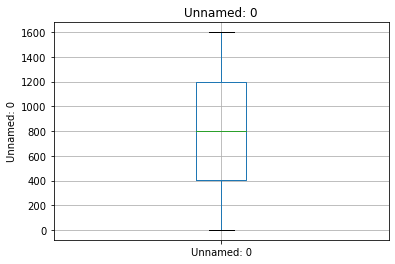

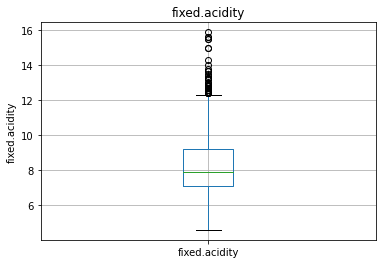

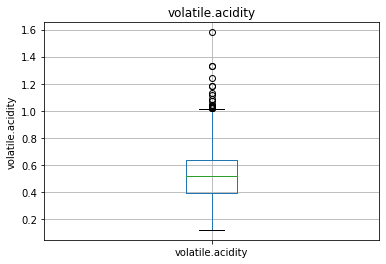

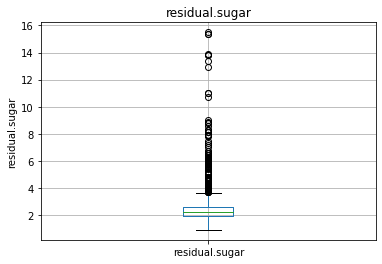

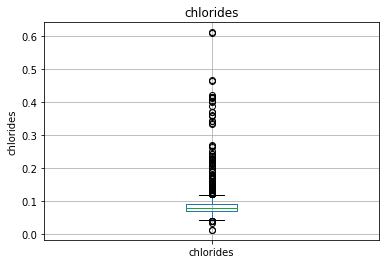

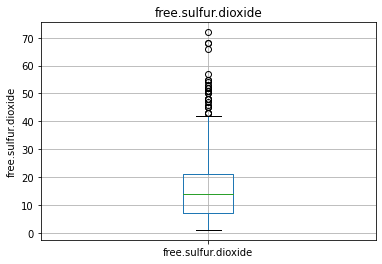

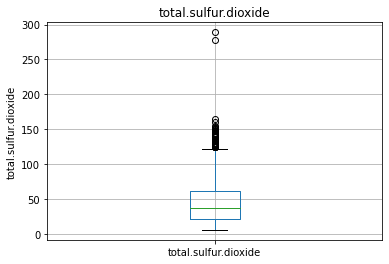

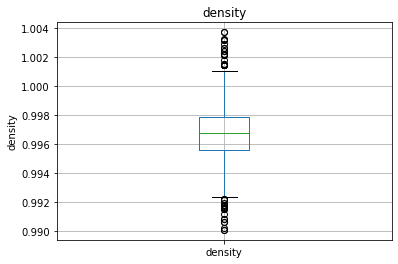

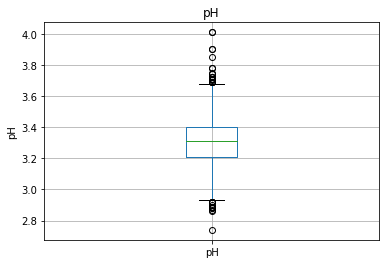

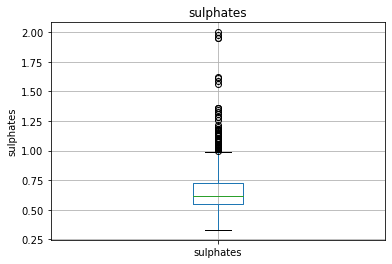

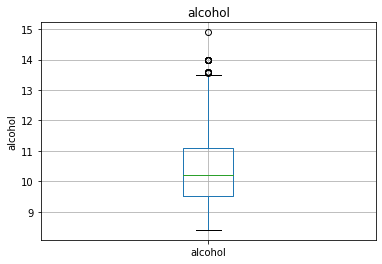

In [28]:
for feature in continuous_features:
    data1 = data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

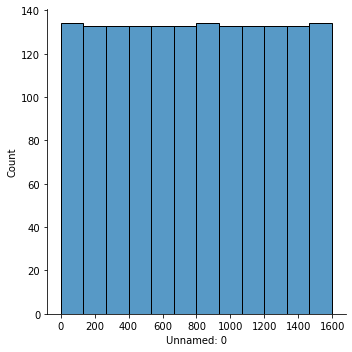

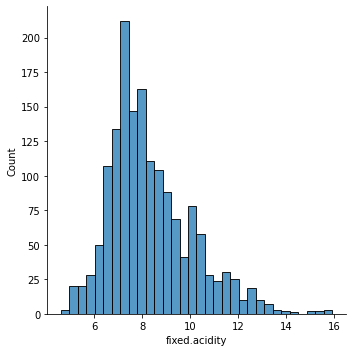

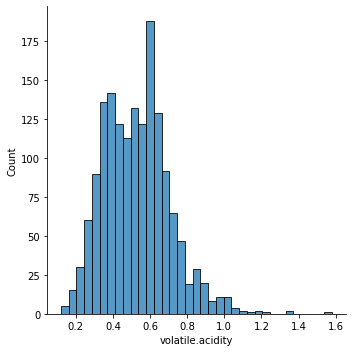

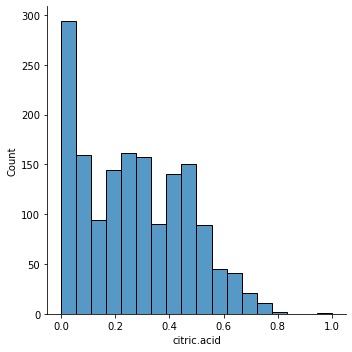

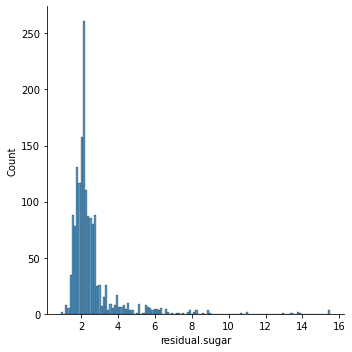

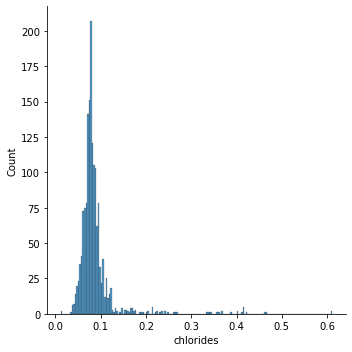

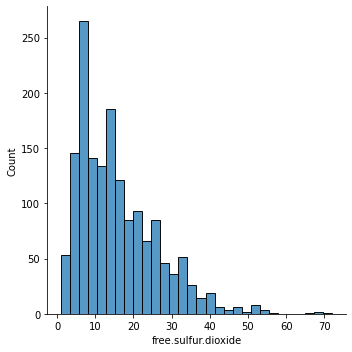

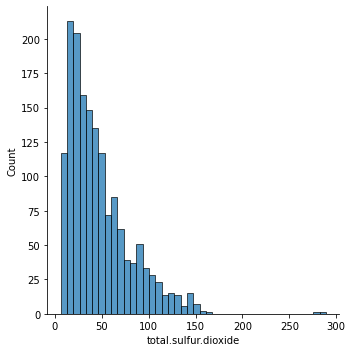

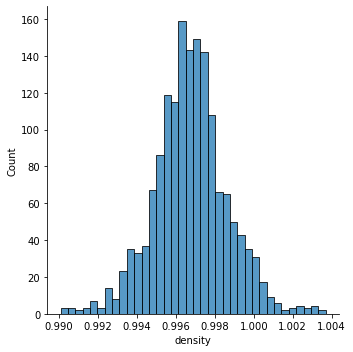

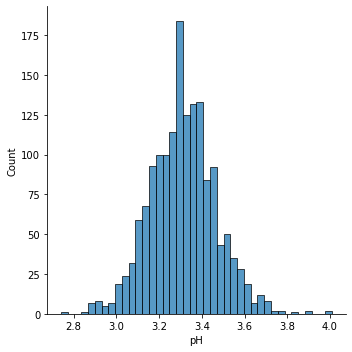

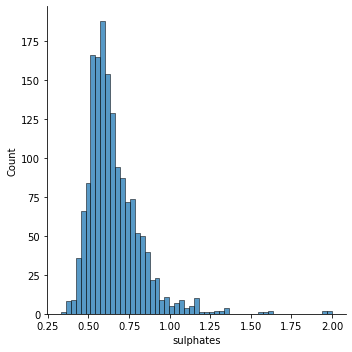

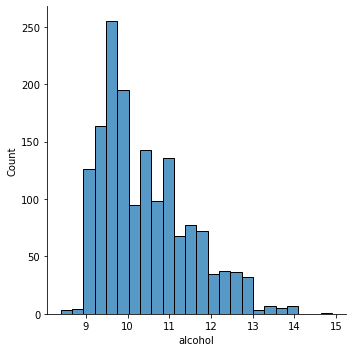

In [31]:
for feature in continuous_features:
    sns.displot(data[feature])

In [34]:
x = data.drop(["quality"],axis=1)
x.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [37]:
y = data["quality"].copy()

In [38]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

In [44]:
x_train = sc.fit_transform(x_train)
x_test =sc.fit_transform(x_test)

In [45]:
from sklearn import svm

In [48]:
clf = svm.SVC(kernel='linear')

In [49]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [50]:
y_pred = clf.predict(x_test)

In [51]:
from sklearn import metrics

In [52]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.6075


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log_reg = LogisticRegression()

In [55]:
log_reg.fit(x_train,y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:

y_pred = log_reg.predict(x_test)

In [58]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6
